# Project description

<b/>This project comes to Assess the performance of the chain's sales outlets at the building-material retailer Home World<b/>

# Description of the data

retail_dataset_us.csv contains:

•	purchaseId

•	item_ID

•	purchase_date

•	Quantity — the number of items in the purchase

•	CustomerID

•	ShopID

•	loyalty_program — whether the customer is a member of the loyalty program

product_codes_us.csv contains:

•	productID
•	price_per_one


# links

Presentation: <https://drive.google.com/file/d/1bYSGDlv8ADVGvS5OGnxjpOZTAi1KYhHm/view?usp=sharing> 

dashborad: <https://public.tableau.com/app/profile/amitai.shibolet/viz/retail_16553125191150/Dashboard1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import datetime as dt
import math 

In [2]:
try:
    retail = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/final  project/retail_dataset_us.csv',parse_dates=['purchasedate'])
    product = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/final  project/product_codes_us.csv ',sep=';')
    
except:
    retail = pd.read_csv('/datasets/retail_dataset_us.csv',parse_dates=['purchasedate']) 
    product = pd.read_csv('/datasets/product_codes_us.csv ',sep=';')
    

# Data preprocessing

#### Check the column names

In [3]:
product.sample(10)
retail.sample(10)

,productID,price_per_one
123,20669,1.25
1839,23005,0.42
207,20818,3.75
2014,47503H,1.95
1030,22136,1.65
2717,85131D,0.83
1049,22156,0.72
1006,22110,2.55
2872,90038A,3.81
1625,22777,7.65


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
32061,538349,22475,1,2016-12-10 14:59:00,NaN,0,Shop 0
8363,536412,22759,0,2016-12-01 11:49:00,23599.0,1,Shop 10
40065,544812,22361,0,2017-02-23 15:58:00,NaN,0,Shop 0
61874,544313,21870,5,2017-02-17 14:36:00,19778.0,0,Shop 17
25382,536544,20622,0,2016-12-01 14:32:00,NaN,0,Shop 0
87267,539642,85231B,9,2016-12-20 15:35:00,21546.0,0,Shop 30
31739,545054,47481,0,2017-02-27 12:41:00,20151.0,0,Shop 1
10397,540176,22302,35,2017-01-05 12:40:00,23190.0,1,Shop 3
73805,545213,22147,11,2017-02-28 16:36:00,22197.0,1,Shop 20
103358,537484,22086,79,2016-12-07 11:30:00,20412.0,0,Shop 10


In [4]:
retail.info()
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   ShopID           105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usag

#### converting Quantity column

i convereted the Quantity coulmn values to all positive values, because the negative values are obviously an error and i dont want to lose this data. the errors are probbaly out of problem in the the way the data came from the server or error in typing the Quantity.

In [5]:
retail['Quantity']=abs(retail['Quantity'])

#### Convert the data to the required types

In [6]:
retail['CustomerID']=retail['CustomerID'].astype('object')

#### Study missing values

we can see the are missing values on the customer id. this values cant be replace with other values and we cant know who this users are, so i decided to take out the data on those customers.

In [7]:
retail.isnull().sum()
product.isnull().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

productID        0
price_per_one    0
dtype: int64

In [8]:
retail=retail.dropna()

#### Checking for duplicate rows

There are 971 duplicated rows,  after examning them we see they spread all a cross the different columns, mostly on item_ID  and spread all a cross the time stamps , what means they are probably out of mistake in the registry on the server, so i decided to take them off.

In [9]:
retail.duplicated().sum()
product.duplicated().sum()

971

0

In [10]:
for i in retail[retail.duplicated()].columns:
    print(i,':', retail[retail.duplicated()][i].nunique())

purchaseid : 351
item_ID : 580
Quantity : 17
purchasedate : 347
CustomerID : 272
loyalty_program : 2
ShopID : 31


In [11]:
retail[retail.duplicated()]['purchasedate'].dt.date.unique()

array([datetime.date(2016, 12, 6), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 9), datetime.date(2016, 12, 5),
       datetime.date(2016, 12, 8), datetime.date(2017, 1, 4),
       datetime.date(2017, 2, 20), datetime.date(2017, 1, 31),
       datetime.date(2016, 12, 12), datetime.date(2016, 12, 1),
       datetime.date(2017, 1, 12), datetime.date(2017, 2, 17),
       datetime.date(2017, 2, 3), datetime.date(2016, 12, 14),
       datetime.date(2017, 2, 28), datetime.date(2016, 12, 2),
       datetime.date(2016, 12, 15), datetime.date(2016, 12, 7),
       datetime.date(2017, 2, 13), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 26),
       datetime.date(2017, 1, 14), datetime.date(2016, 12, 10),
       datetime.date(2016, 12, 16), datetime.date(2017, 1, 16),
       datetime.date(2017, 1, 25), datetime.date(2016, 12, 19),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 19),
       datetime.date(2017, 2, 10), datetime.date(201

#### Replace the column names

In [12]:
retail.rename(columns = {'purchasedate':'purchase_date','purchaseid':'purchase_id','CustomerID':'customer_id','ShopID':'shop_id','item_ID':'product_id'}, inplace = True)
product.rename(columns = {'productID':'product_id'},inplace = True)

#### Remove duplicates

In [13]:
retail=retail.drop_duplicates()

#### checking anomalies in the data

as we can see there are two purcahses with unreasible number of items. we can see they are from the same user, so there is probably a mistake in the item numbers and they distorted the all data, they far above the 98 percntile of the data, so i decdied to take them off.

In [14]:
retail['Quantity'].max()
np.percentile(retail['Quantity'], 98)

74216

95.0

In [15]:
retail[retail.Quantity>70000]

,purchase_id,product_id,Quantity,purchase_date,customer_id,loyalty_program,shop_id
49411,C541433,23166,74216,2017-01-18 10:17:00,18025.0,0,Shop 21
69074,541431,23166,74214,2017-01-18 10:01:00,18025.0,0,Shop 15


In [16]:
retail=retail[retail.Quantity<70000]

# Exploratory data analysis

#### Study the mean values and standard deviations

In [17]:
retail.describe(include='all').T
product.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
purchase_id,68152,4144,543040,244,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,68152,2775,85123A,507,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,68152.0,NaN,NaN,NaN,NaT,NaT,11.883892,60.627847,0.0,1.0,4.0,11.0,9361.0
purchase_date,68152,3863,2017-02-02 17:06:00,244,2016-12-01 08:26:00,2017-02-28 17:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,68152.0,1748.0,18427.0,774.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loyalty_program,68152.0,NaN,NaN,NaN,NaT,NaT,0.343526,0.474889,0.0,0.0,0.0,1.0,1.0
shop_id,68152,31,Shop 1,2689,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,3159,3159,10002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_per_one,3159.0,NaN,NaN,NaN,2.954495,7.213808,0.0,0.65,1.45,3.29,175.0


#### study the purchases time period

we can see that the purchase date range is between the 01/12/2016-28/02/2017.

we can see on the distrbution of purcahses time that the purchase spread along the days with breaks once a week probably because the stores are closed on sundays. and also we can see the big break that start on 23/12/2006-4/1/2007 probably out of christmas holiday.

we can also see that on the beginning of the date range there are more purchases per day probably because its the days before christmas.

In [18]:
retail['purchase_date'].max()
retail['purchase_date'].min()

Timestamp('2017-02-28 17:01:00')

Timestamp('2016-12-01 08:26:00')

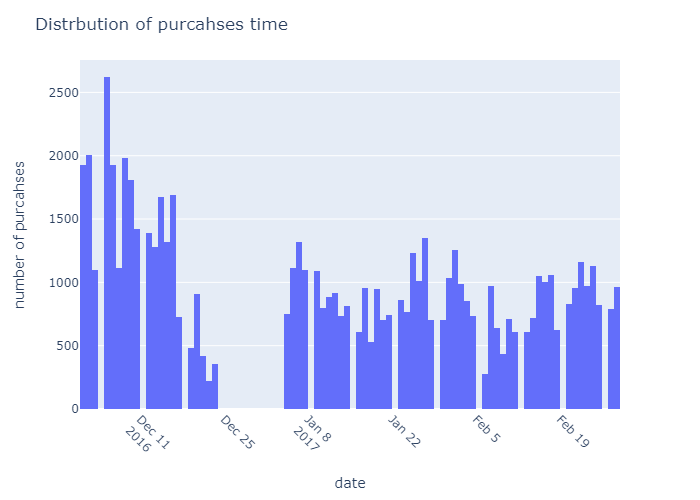

In [19]:
fig = px.histogram(retail, x="purchase_date")
fig.update_layout(title='Distrbution of purcahses time',
                   xaxis_title='date',
                   yaxis_title='number of purcahses')
fig.update_xaxes(tickangle=45)
fig.show("png");

### Study and calculate the core metrics per customer by week

In [20]:
retail=retail.merge(product,on='product_id')

In [21]:
retail['Revenue']=retail['Quantity']*retail['price_per_one']

#### Average number of purcahses  per  customer by weekly cohorts

we can see that the first and second weekly cohorts are the best ones in the average number of purchases per customer probably  out of the shopping for christmas.

In [22]:
first_order_date = retail.groupby('customer_id')[
    'purchase_date'
].min()
first_order_date.name = 'first_order_date'
retail = retail.merge(first_order_date, on='customer_id')
retail['first_order_week'] = retail['first_order_date'].astype(
    'datetime64[W]'
)
retail['order_week'] = retail['purchase_date'].astype('datetime64[W]')
retail['first_order_week']=retail['first_order_week'].dt.date
retail['order_week']=retail['order_week'].dt.date
retail['age_week']=(
    retail['order_week'] - retail['first_order_week']
) / np.timedelta64(1, 'W')
retail['age_week']= retail['age_week'].round().astype('int')

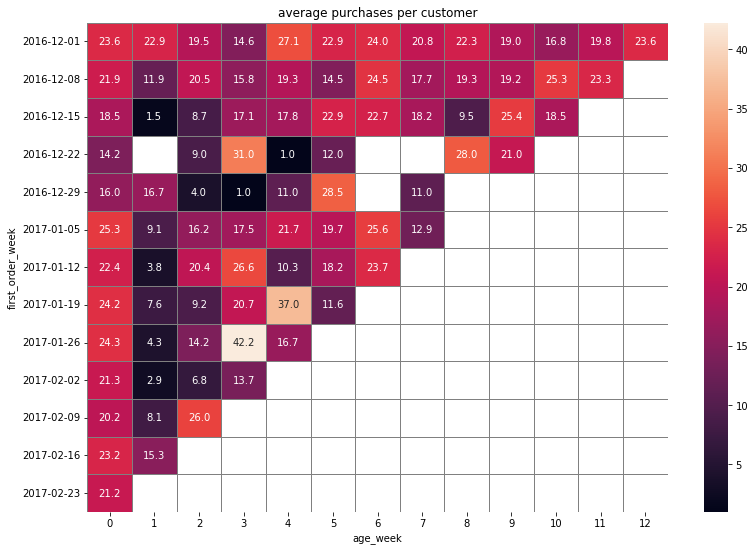

In [23]:
orders_count_by_cohorts = retail.groupby(
    ['first_order_week', 'age_week']
).agg({'purchase_date': 'count', 'customer_id': 'nunique'})
orders_count_by_cohorts['orders_per_buyer'] = (
    orders_count_by_cohorts['purchase_date']
    / orders_count_by_cohorts['customer_id']
) 
orders_pivot=orders_count_by_cohorts.pivot_table(
    index='first_order_week',
    columns='age_week',
    values='orders_per_buyer',
    aggfunc='mean',
)
orders_pivot.round(2).fillna('')
plt.figure(figsize=(13, 9))
plt.title('average purchases per customer')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray'
) 
plt.show();

#### Average customer purchase size by weekly cohorts

We can see the third cohort of 15/12/2006 brings the highest revenue with some big purchase size , maybe chirtsmas presents was real something this year.

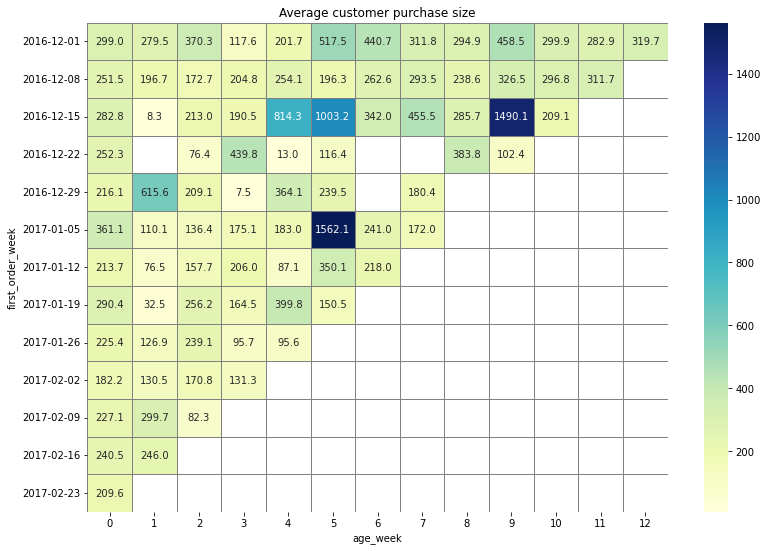

In [24]:
orders_revenue_by_cohorts = retail.groupby(
    ['first_order_week', 'age_week']
).agg({'Revenue': 'sum', 'customer_id': 'nunique'})
orders_revenue_by_cohorts['revenue_per_customer'] = (
    orders_revenue_by_cohorts['Revenue']
    / orders_revenue_by_cohorts['customer_id']
) 
revenue_pivot=orders_revenue_by_cohorts.pivot_table(
    index='first_order_week',
    columns='age_week',
    values='revenue_per_customer',
    aggfunc='mean',
) 
plt.figure(figsize=(13, 9))
plt.title('Average customer purchase size')
sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap="YlGnBu"
) 
plt.show();

#### Average revenue per purchase by weekly chorots

Unsurprisingly the chorot of 15/12/2006 has the biggest Average revenue per purchase values, as we said great presents.

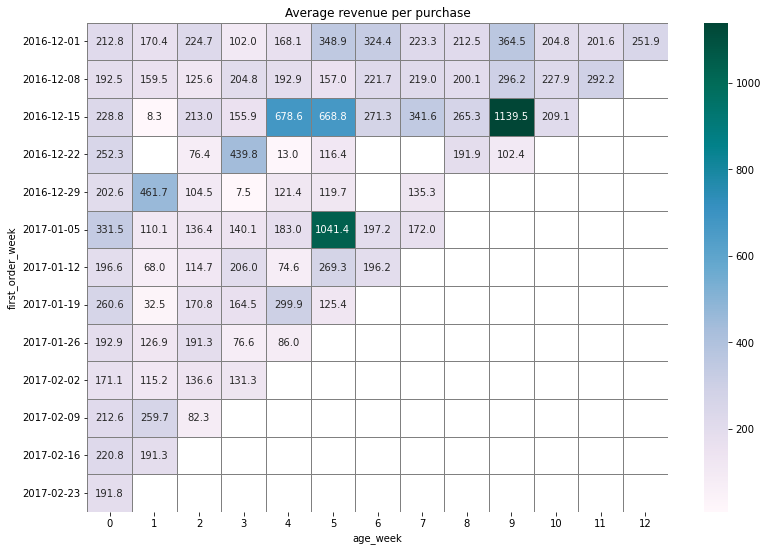

In [25]:
orders_avg_revenue_by_cohorts = retail.groupby(
    ['first_order_week', 'age_week']
).agg({'Revenue': 'sum', 'purchase_id': 'nunique'})
orders_avg_revenue_by_cohorts['revenue_per_customer'] = (
    orders_avg_revenue_by_cohorts['Revenue']
    / orders_avg_revenue_by_cohorts['purchase_id']
) 
revenue_pivot=orders_avg_revenue_by_cohorts.pivot_table(
    index='first_order_week',
    columns='age_week',
    values='revenue_per_customer',
    aggfunc='mean',
) 
plt.figure(figsize=(13, 9))
plt.title('Average revenue per purchase')
sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap='PuBuGn'
) 
plt.show();

#### Monthy Customer Retention Rate

In [26]:
#pip install roi
from roi import cohort_analysis

Creating Cohorts


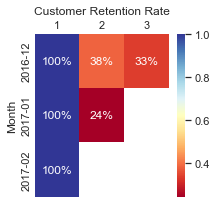

In [27]:
analysis=cohort_analysis(input_df=retail, ActivityDate='purchase_date', CustomerID='customer_id')
analysis.plot_retention()
plt.title('Customer Retention Rate')
plt.xlabel('')
plt.ylabel('Month')
plt.show();

### Study and calculate the core matrics per shop

#### Average purchase size
We can see that shops 5 , 25 and 4 are at the top.

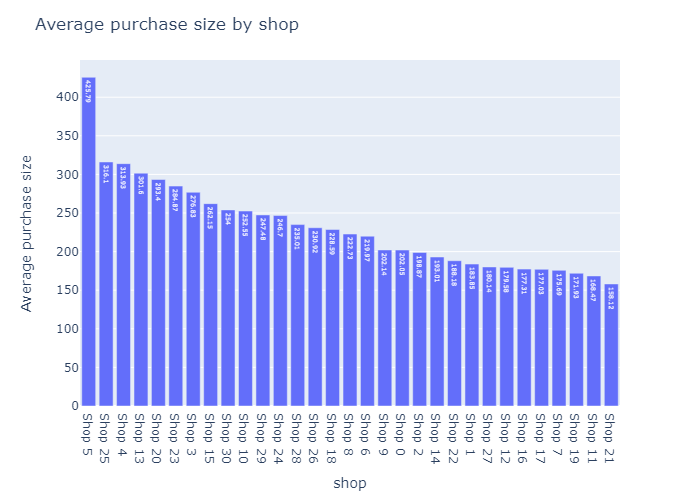

In [28]:
avg_purchase = retail.groupby(
    ['shop_id']
).agg({'Revenue': 'sum', 'purchase_id': 'nunique'}).reset_index()
avg_purchase['avg_purchase'] = (
    avg_purchase['Revenue']
    / avg_purchase['purchase_id'])
avg_purchase['avg_purchase']=round(avg_purchase['avg_purchase'],2)
fig = px.bar(avg_purchase.sort_values(by='avg_purchase',ascending=False), x="shop_id", y="avg_purchase", text_auto=True)
fig.update_layout(title='Average purchase size by shop',
                   xaxis_title='shop',
                   yaxis_title='Average purchase size')
fig.show("png");


#### Number of purchases by day/week
We can see that shop 5 has good numbers and here also shop 1 and 15 join.

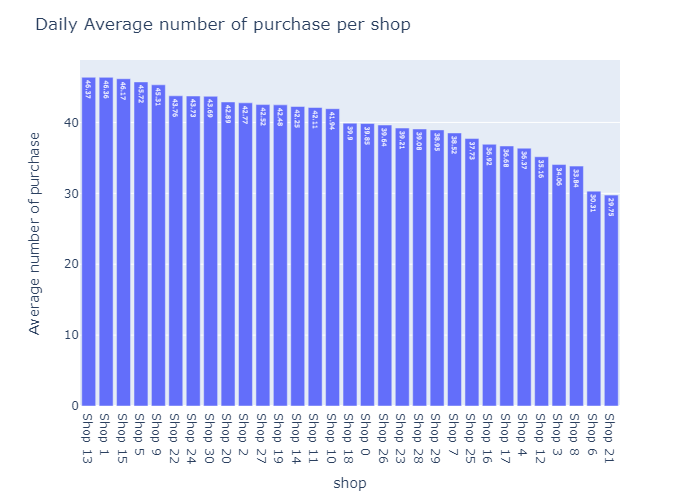

In [29]:
retail['order_day'] = retail['purchase_date'].astype('datetime64[D]')
num_purchase = retail.groupby(
    ['shop_id']
).agg({'purchase_id': 'count', 'order_day': 'nunique'}).reset_index()
num_purchase['avg_num_purchase'] = (
    num_purchase['purchase_id']
    / num_purchase['order_day'])
num_purchase['avg_num_purchase']=round(num_purchase['avg_num_purchase'],2)
fig = px.bar(num_purchase.sort_values(by='avg_num_purchase',ascending=False), x="shop_id", y="avg_num_purchase", text_auto=True)
fig.update_layout(title='Daily Average number of purchase per shop',
                   xaxis_title='shop',
                   yaxis_title='Average number of purchase')
fig.show("png");

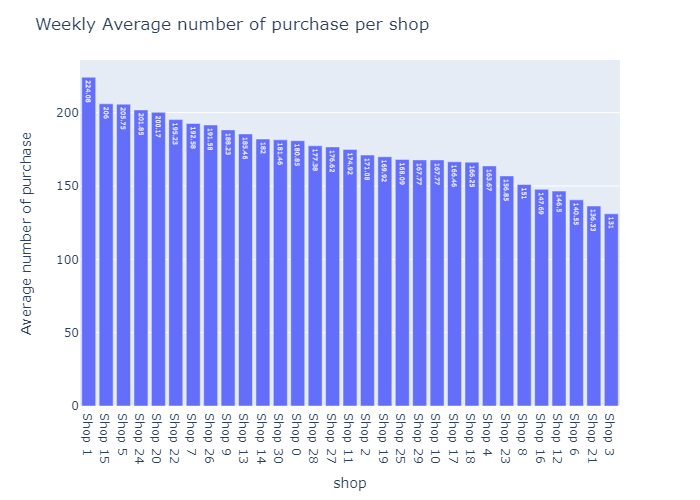

In [30]:
num_purchase = retail.groupby(
    ['shop_id']
).agg({'purchase_id': 'count', 'order_week': 'nunique'}).reset_index()
num_purchase['avg_num_purchase'] = (
    num_purchase['purchase_id']
    / num_purchase['order_week'])
num_purchase['avg_num_purchase']=round(num_purchase['avg_num_purchase'],2)
fig = px.bar(num_purchase.sort_values(by='avg_num_purchase',ascending=False), x="shop_id", y="avg_num_purchase", text_auto=True)
fig.update_layout(title='Weekly Average number of purchase per shop',
                   xaxis_title='shop',
                   yaxis_title='Average number of purchase')
fig.show("png");

#### Average revenue by by day/week

we can see that shop 5 is standing above all other stores in means of average revenue.

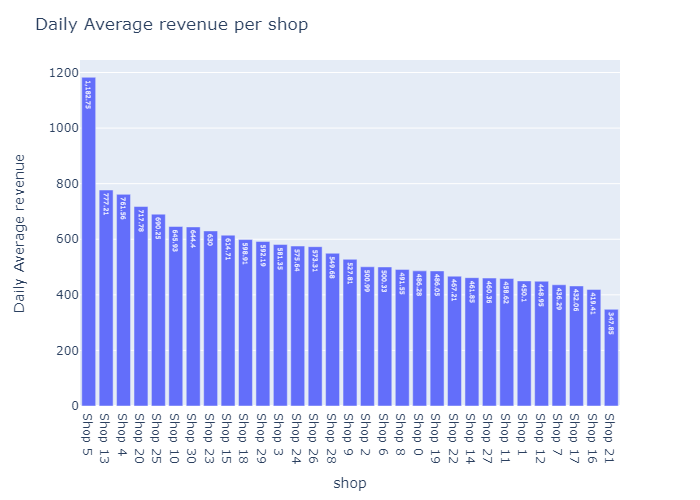

In [31]:
total_purchase = retail.groupby(
    ['shop_id']
).agg({'Revenue': 'sum', 'order_day': 'nunique'}).reset_index()
total_purchase['avg_purchase'] = (
    total_purchase['Revenue']
    / total_purchase['order_day'])
total_purchase['avg_purchase']=round(total_purchase['avg_purchase'],2)
fig = px.bar(total_purchase.sort_values(by='avg_purchase',ascending=False), x="shop_id", y="avg_purchase", text_auto=True)
fig.update_layout(title='Daily Average revenue per shop',
                   xaxis_title='shop',
                   yaxis_title='Daily Average revenue')
fig.show("png");

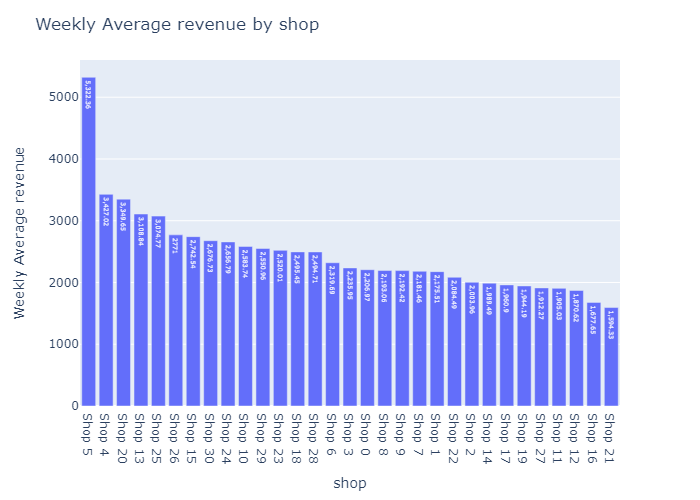

In [32]:
total_purchase = retail.groupby(
    ['shop_id']
).agg({'Revenue': 'sum', 'order_week': 'nunique'}).reset_index()
total_purchase['avg_purchase'] = (
    total_purchase['Revenue']
    / total_purchase['order_week'])
total_purchase['avg_purchase']=round(total_purchase['avg_purchase'],2)
fig = px.bar(total_purchase.sort_values(by='avg_purchase',ascending=False), x="shop_id", y="avg_purchase", text_auto=True)
fig.update_layout(title='Weekly Average revenue by shop',
                   xaxis_title='shop',
                   yaxis_title='Weekly Average revenue')
fig.show("png");

# Exploratory data analysis conclusion

<b/>Customer part<b/>

On the average number of purcahses per customer we can see that the first and second weekly cohorts of 01/12/2006 and 08/12/2006, are the best ones in the average number of purcahses per customer, but when we look at the Average customer purchase size by weekly cohorts we can see the third cohort of 15/12/2006 brings the highest revenue and the biggest Average revenue per purchase values.

When we look at the customers retention rate we can see the customers of 12/2006 has a higher retention rate and its drop down next month, probably after the chirstamas shoping. the average retention rate are around 31%, that quite good retntion rates.

<b/>Shops part<b/>

When we examine the different business matrics of our different shops we can see that shop5 has the best results overall, on the Average purchase size shops 5 , 25 and 4 are at the top. while on number of purchases by day/week
we can see that shop 5 has good numbers and here also shop 1 and 15 join.

and finally when we look at the total revenue we can see that on the Average revenue by by day/week , shop 5 is standing above all other shops.

# Study Retail KPIs per shop in order to asses the shop preformance

#### Items per Transaction

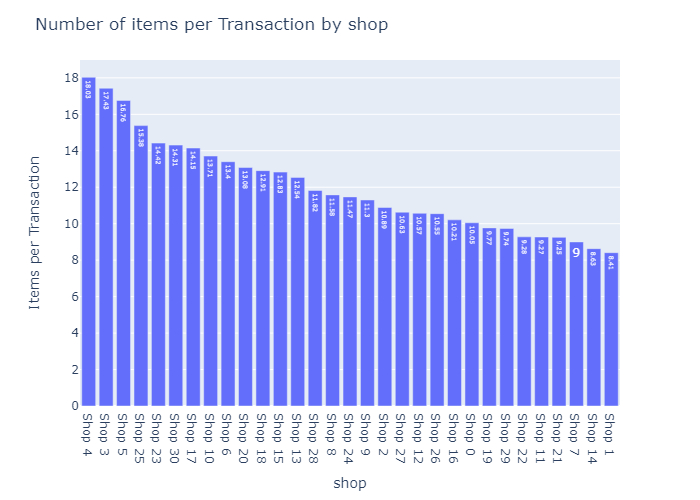

In [33]:
unit = retail.groupby(
    ['shop_id']
).agg({'Quantity': 'sum', 'purchase_id': 'count'}).reset_index()
unit['unit_per'] = (
    unit['Quantity']
    / unit['purchase_id'])
unit['unit_per']=round(unit['unit_per'],2)
fig = px.bar(unit.sort_values(by='unit_per',ascending=False), x="shop_id", y="unit_per", text_auto=True)
fig.update_layout(title='Number of items per Transaction by shop',
                   xaxis_title='shop',
                   yaxis_title='Items per Transaction')
fig.show("png");

#### Customer Conversion Rate

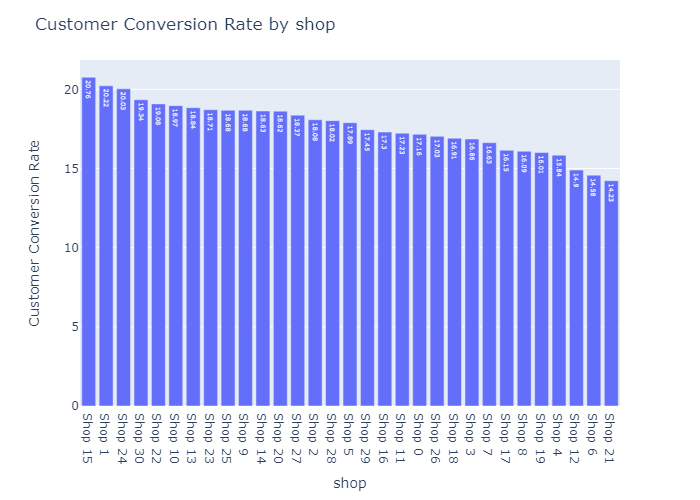

In [34]:
ret_rate = retail.groupby(
    ['shop_id']
).agg({'purchase_id': 'count', 'customer_id': 'nunique'}).reset_index()
ret_rate['Conversion'] = (
    ret_rate['purchase_id']
    / ret_rate['customer_id'])
ret_rate['Conversion']=round(ret_rate['Conversion'],2)
fig = px.bar(ret_rate.sort_values(by='Conversion',ascending=False), x="shop_id", y="Conversion", text_auto=True)
fig.update_layout(title='Customer Conversion Rate by shop',
                   xaxis_title='shop',
                   yaxis_title='Customer Conversion Rate ')
fig.show("png");

#### Month-over-Month revenue Growth

In [35]:
by_month=pd.pivot_table(retail,index='Purchase_month',columns='shop_id',values='Revenue',aggfunc='sum')
dynamics=(by_month-by_month.shift(+1)).reset_index()
dynamics.T


,0,1,2
shop_id,,,
Purchase_month,2016-12,2017-01,2017-02
Shop 0,NaT,-6979.5,-1703.82
Shop 1,NaT,3266.45,126.23
Shop 10,NaT,-5329.96,3831.74
Shop 11,NaT,-3020.54,5009.06
Shop 12,NaT,-4358.38,-3117.62
Shop 13,NaT,9027.72,-15658.67
Shop 14,NaT,-953.43,-1175.22
Shop 15,NaT,3325.33,-10621.3


# Retail KPIs per shop conclusion

When we look at the different KPIs per shop we can see that on the units per transction scores shops 4 , 3 and 5 are at the top. while on the Customer Conversion Rate scores are quite similar with shops 15,1 and 24 on the top.

The Month-over-Month revenue Growth metric gives us some intersting facts that need to be concidered.

We can see that shop 5 that has the highest average revenues, is going down by profit month after month, while shop 21 with lowest revenue in deed started the first month in losses but then move to profit. 

We can also see there is instablity in the monthly revenue growth in some shops like shop 13 for example who moved from growth profit of 9027 dollars in one month to loss of 15,658 dollars in the other.


# Test the following hypotheses

In [36]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print('p value: ',p_value)
    if p_value<alpha:
        print('Reject null hypothesis (H₀)')
    else:
        print('Fail to Reject null hypothesis (H₀)')

#### Checking if the Average purchase size of shop 1 with the most purchases and shop 21 with the fewest purchases are statistically different.

My null hypothesis (H₀) is that the Average purchase size of shop 1 with the most purchases and shop 21 with the fewest purchases are equal.

My alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that the Average purchase size of shop 1 with the most purchases and shop 21 with the fewest purchases are different.

The significance level to test the hypotheses is the conventional threshold values of 5%.

In [37]:
shop21=retail[retail.shop_id=="Shop 21"]['Revenue']
shop1=retail[retail.shop_id=="Shop 1"]['Revenue']

In [38]:
testing_average(shop21,shop1,alpha=0.05)

p value:  1.2169049903246508e-08
Reject null hypothesis (H₀)


#### Checking if Average revenue per customer for cutomers on the loyal program and not on the program is the same.

My null hypothesis (H₀) is that the Average revenue per customer for cutomers on the loyal program and not on the program is the same.

My alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that the Average revenue per customer for cutomers on the loyal program and not on the program is different.

The significance level to test the hypotheses is the conventional threshold values of 5%.


In [39]:
loyal=retail[retail.loyalty_program==0]['Revenue']
n_loyal=retail[retail.loyalty_program==1]['Revenue']

In [40]:
testing_average(loyal,n_loyal,alpha=0.05)

p value:  2.6729319276149153e-199
Reject null hypothesis (H₀)


### Hypotheses test conclusion

On the first hypothesis , we got the small p-value 1.2169049903246508e-08 that is clearly smaller then our alpha of 0.05, what means we can reject the null hypothesis (H₀), and say that there is statistically significant difference between the Average purchase size of shop 1 with the most purchases and shop 21 with the fewest purchases.

On the second hypothesis , we got the small p-value 2.6729319276149153e-199 that is clearly smaller then our alpha of 0.05, what means we can reject the null hypothesis (H₀), and say there is statistically significant difference between the Average revenue per customer for cutomers on the loyal program and not on the program.


# General conclusion

This report comes to Assess the performance of the chain's sales outlets at the building-material retailer Home World.

After analyzing the data, i came across some finding and conclusions i will show here.

When studying the data on our customers and calculate the core matrics per customer by weekly cohorts we can see that 
on the average number of purcahses per customer the first and second weekly cohorts of 01/12/2006 and 08/12/2006, are the best ones, but when we look at the Average customer purchase size by weekly cohorts we can see the third cohort of 15/12/2006 brings the highest revenue and the biggest Average revenue per purchase values.

When we look at the customers retention rate we can see the customers of 12/2006 has a higher retention rate and its drop down next month, probably after the christmas shoping. 

The average retention rate are around 31%, that quite good retention rates.

When we examine the core metrics per shop we can see that shop 5 has the best results overall, ont the Average purchase size shops 5 , 25 and 4 are at the top. while on number of purchases by day/week we can see that shop 5 has good numbers and here also shop 1 and 15 join. and finally when we look on total revenue we can see that on the Average revenue by day/week , shop 5 is standing above all other shops.

Out of studying the major KPIs per shop we come to see that on the units per transaction scores shops 4 , 3 and 5 are at the top. while the Customer Conversion Rate scores are quite similar with shops 15,1 and 24 on the top.

The Month-over-Month revenue Growth metric gives us some intersting facts that need to be considered. 
we can see that shop 5 that has the highest average revenues, is going down by profit month after month, while shop 21 with lowest revenue in deed started the first month in losses but then move to profit. 
we can also see there is instablity in the monthly revenue growth in some shops like shop 13 for example who moved from growth profit of 9027 dollars in one month to loss of 15,658 dollars in the other.

We preform statistical test to get deeper understanding on our shops.

The first test shows us there is statistically significant difference between the Average purchase size of shop 1 with the most purchases and shop 21 with the fewest purchases. 

The second test show us there is statistically significant difference between the Average revenue per customer for cutomers on the loyal program and not on the program. this can suggest there is an impact to loyal program on the revenue per customer, but more research needed to determine if its good or bad impact.